# **CRIME IN BALTIMORE NOTEBOOK**

The current notebook is aim to study the crime in Baltimore, Maryland - United States. The goal of the study is to understand the crime principal aspects through an EDA process.

First of all, let's load the data and import some requiered libraries:

In [1]:
## libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## database
baltimore_data = pd.read_csv("BPD_Part_1_Victim_Based_Crime_Data.csv")

### **Visualizing and 'cleaning' data and types**

In [2]:
## data types summary
print("The data in compund of {} rows and {} features.\n".format(baltimore_data.shape[0],baltimore_data.shape[1]))
baltimore_data.info()

The data in compund of 276529 rows and 15 features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
CrimeDate          276529 non-null object
CrimeTime          276529 non-null object
CrimeCode          276529 non-null object
Location           274322 non-null object
Description        276529 non-null object
Inside/Outside     266250 non-null object
Weapon             95577 non-null object
Post               276305 non-null float64
District           276449 non-null object
Neighborhood       273789 non-null object
Longitude          274325 non-null float64
Latitude           274325 non-null float64
Location 1         274325 non-null object
Premise            265772 non-null object
Total Incidents    276529 non-null int64
dtypes: float64(3), int64(1), object(11)
memory usage: 31.6+ MB


In [3]:
## first 5 rows
baltimore_data.head()

CrimeDate CrimeTime CrimeCode           Location          Description  \
0  09/02/2017  23:30:00       3JK    4200 AUDREY AVE  ROBBERY - RESIDENCE   
1  09/02/2017  23:00:00        7A  800 NEWINGTON AVE           AUTO THEFT   
2  09/02/2017  22:53:00        9S      600 RADNOR AV             SHOOTING   
3  09/02/2017  22:50:00        4C     1800 RAMSAY ST         AGG. ASSAULT   
4  09/02/2017  22:31:00        4E       100 LIGHT ST       COMMON ASSAULT   

  Inside/Outside   Weapon   Post  District      Neighborhood  Longitude  \
0              I    KNIFE  913.0  SOUTHERN          Brooklyn  -76.60541   
1              O      NaN  133.0   CENTRAL    Reservoir Hill  -76.63217   
2        Outside  FIREARM  524.0  NORTHERN    Winston-Govans  -76.60697   
3              I    OTHER  934.0  SOUTHERN  Carrollton Ridge  -76.64526   
4              O    HANDS  113.0   CENTRAL     Downtown West  -76.61365   

   Latitude                       Location 1     Premise  Total Incidents  
0  39.22951  (39.2295100000, -76.6054100000)  ROW/TOWNHO                1  
1  39.31360  (39.3136000000, -76.6321700000)      STREET                1  
2  39.34768  (39.3476800000, -76.6069700000)      Street                1  
3  39.28315  (39.2831500000, -76.6452600000)  ROW/TOWNHO                1  
4  39.28756  (39.2875600000, -76.6136500000)      STREET                1

* Just columns 'CrimeDate', 'CrimeTime', 'CrimeCode', 'Desciption' and 'Total Incidents' have no missing values. Where the column 'weapon' shows and important lack of values. 
* There are four numeric columns, corresponding to 'Post', 'Longitude', 'Latitude' and 'Total Incidents'. 

We could convert the time of the column CrimeDate to datetime and also change the name of the column 'Description' to 'CrimeType' as follow:

In [4]:
## renaming column
baltimore_data = baltimore_data.rename(columns={'Description':'CrimeType'})

## Object type to datetime
baltimore_data['CrimeDate'] = pd.to_datetime(baltimore_data['CrimeDate'])
baltimore_data.dtypes

CrimeDate          datetime64[ns]
CrimeTime                  object
CrimeCode                  object
Location                   object
CrimeType                  object
Inside/Outside             object
Weapon                     object
Post                      float64
District                   object
Neighborhood               object
Longitude                 float64
Latitude                  float64
Location 1                 object
Premise                    object
Total Incidents             int64
dtype: object

Since 'Weapon' column has more than 60% of missing values, we're not taking it into account for the analysis, so it's better to remove it from the data and then drop null values from the other columns. 

In [5]:
## Removind Weapong column
baltimore_data = baltimore_data.drop(['Weapon'], axis=1)


## Dropping null values
baltimore_data = baltimore_data.dropna(axis=0, how='any')


## data
baltimore_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263118 entries, 0 to 276528
Data columns (total 14 columns):
CrimeDate          263118 non-null datetime64[ns]
CrimeTime          263118 non-null object
CrimeCode          263118 non-null object
Location           263118 non-null object
CrimeType          263118 non-null object
Inside/Outside     263118 non-null object
Post               263118 non-null float64
District           263118 non-null object
Neighborhood       263118 non-null object
Longitude          263118 non-null float64
Latitude           263118 non-null float64
Location 1         263118 non-null object
Premise            263118 non-null object
Total Incidents    263118 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 30.1+ MB


* **Formating Hour**

Defining a function for classifying the CrimeTime in morning, afternoong and night.

In [6]:
## Function for telling if crime happened in the morning, in the afternoon or at night

def day_state(x):
    if '04:00:00' < x < '12:00:00':
        message = 'Morning'
    elif '12:00:00' < x < '19:00:00':
        message = 'Afternoon'
    else:
        message='Night'
    return(message)        

In [7]:
## Adding column to the dataframe

baltimore_data['Day_Moment'] = baltimore_data['CrimeTime'].apply(lambda x: day_state(x))

* **Inside/Outside**

This column has redundant rows since I = Inside and O = Outside. So, let's replace I by Inside and O by Outside in the database.

In [8]:
## Let's change letter I by Inside and O by Outside

baltimore_data['Inside/Outside'] = baltimore_data['Inside/Outside'].replace({'I':'Inside', 'O':'Outside'})

* ##### **Formatting Date**

In [9]:
## fuction for getting the month name
names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dic'}
def month_name(x):
    return names[x]

In [10]:
## Getting the day, month and year separately
import datetime

baltimore_data['Day'] = pd.DatetimeIndex(baltimore_data['CrimeDate']).day
baltimore_data['Month'] = pd.DatetimeIndex(baltimore_data['CrimeDate']).month
baltimore_data['Year'] = pd.DatetimeIndex(baltimore_data['CrimeDate']).year
baltimore_data['WeekDay'] = pd.DatetimeIndex(baltimore_data['CrimeDate']).day_name()
baltimore_data['Month_Name'] = baltimore_data['Month'].apply(lambda x: month_name(x))

baltimore_data.head()

CrimeDate CrimeTime CrimeCode           Location            CrimeType  \
0 2017-09-02  23:30:00       3JK    4200 AUDREY AVE  ROBBERY - RESIDENCE   
1 2017-09-02  23:00:00        7A  800 NEWINGTON AVE           AUTO THEFT   
2 2017-09-02  22:53:00        9S      600 RADNOR AV             SHOOTING   
3 2017-09-02  22:50:00        4C     1800 RAMSAY ST         AGG. ASSAULT   
4 2017-09-02  22:31:00        4E       100 LIGHT ST       COMMON ASSAULT   

  Inside/Outside   Post  District      Neighborhood  Longitude  Latitude  \
0         Inside  913.0  SOUTHERN          Brooklyn  -76.60541  39.22951   
1        Outside  133.0   CENTRAL    Reservoir Hill  -76.63217  39.31360   
2        Outside  524.0  NORTHERN    Winston-Govans  -76.60697  39.34768   
3         Inside  934.0  SOUTHERN  Carrollton Ridge  -76.64526  39.28315   
4        Outside  113.0   CENTRAL     Downtown West  -76.61365  39.28756   

                        Location 1     Premise  Total Incidents Day_Moment  \
0  (39.2295100000, -76.6054100000)  ROW/TOWNHO                1      Night   
1  (39.3136000000, -76.6321700000)      STREET                1      Night   
2  (39.3476800000, -76.6069700000)      Street                1      Night   
3  (39.2831500000, -76.6452600000)  ROW/TOWNHO                1      Night   
4  (39.2875600000, -76.6136500000)      STREET                1      Night   

   Day  Month  Year   WeekDay Month_Name  
0    2      9  2017  Saturday        Sep  
1    2      9  2017  Saturday        Sep  
2    2      9  2017  Saturday        Sep  
3    2      9  2017  Saturday        Sep  
4    2      9  2017  Saturday        Sep

### **Exploring the Remaining Dataset**

Let's explore the crime type distribution in Baltimore over the years of study (2013 - 2017). 

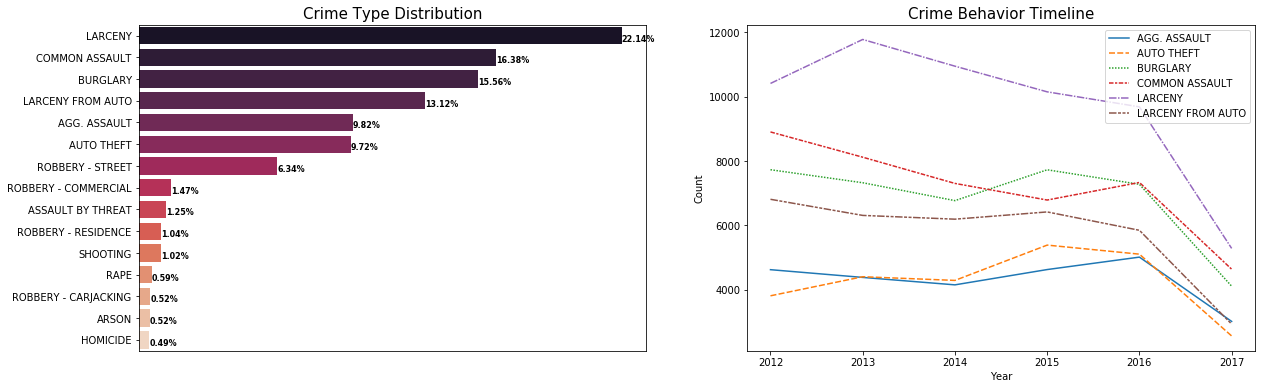

In [11]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(20,6))

### Plotting the crime distriibution over the period of study

order = baltimore_data['CrimeType'].value_counts(ascending=False).index
ax1 = sns.countplot(y='CrimeType', data=baltimore_data, order=order, palette='rocket', ax=axes1)
ax1.axes.get_xaxis().set_visible(False)
ax1.set_title('Crime Type Distribution', fontsize=15)
ax1.set_ylabel('')

for p in ax1.patches:
     ax1.annotate('{:.2f}%'.format(p.get_width()*100/len(baltimore_data)), (p.get_x()+p.get_width(), p.get_y()+p.get_height()-0.15), weight = 'bold', size=8)

        
        
### Timeline of the first six crime types

## ISIN function to filter data
baltimore_crime = baltimore_data.loc[baltimore_data.CrimeType.isin(['LARCENY', 'COMMON ASSAULT', 'BURGLARY', 'LARCENY FROM AUTO', 'AGG. ASSAULT', 'AUTO THEFT'])]

## count
table1 = baltimore_crime.groupby(["Year", 'CrimeType']).size().reset_index(name='Total Incidents')

### creating a table with the results
table2 = table1.pivot(index='Year', columns='CrimeType', values='Total Incidents')

##lineplot
ax2=sns.lineplot(data=table2, ax=axes2)
ax2.set_title('Crime Behavior Timeline', fontsize=15)
ax2.set_ylabel('Count')

plt.show()       

* *Larceny* has the higest amount of occurences followed by *Commond Assault* and so on until *Homicide* which has the lest percentage among crime types. 
* In general, the crime rate tend to decrease from 2012 to 2017.

Text(0.5, 1, 'Crime Count by Month and Year')

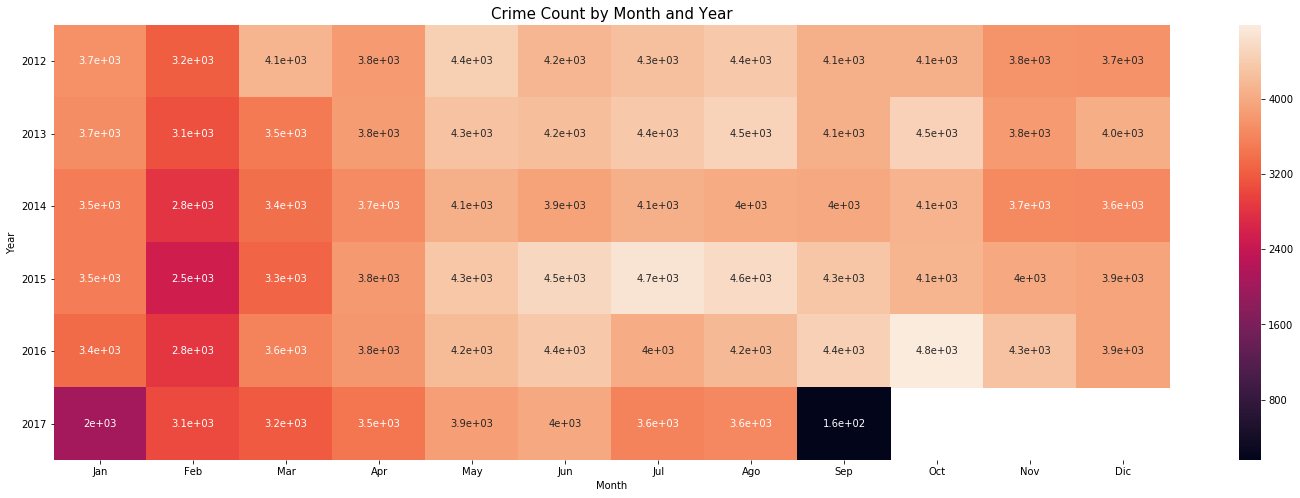

In [12]:
### HEATMAP -  CRIME BY MONTH AND YEAR

## Let's count the amount incidents per month and year
table1 = baltimore_data.groupby(["Year", "Month"]).size().reset_index(name='Total Incidents')

### creating a table with the results
table2 = table1.pivot(index='Year', columns='Month', values='Total Incidents')

## label
x_axis_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']


##heatmap
plt.figure(figsize=(25,8))
ax = sns.heatmap(table2, annot=True, annot_kws={"size": 10}, xticklabels=x_axis_labels)
[items.set_rotation(0) for items in ax.get_yticklabels()] ## rotating y axes
ax.set_ylim([6, 0])
ax.set_title('Crime Count by Month and Year', fontsize=15)

* The higest amount of crimes occured during october/2016 according with the previous heatmap.
* 2017 tend to have low crime rates compared to the other years. 
* The dataset doesn't contain data for the 3 last month of 2017. 

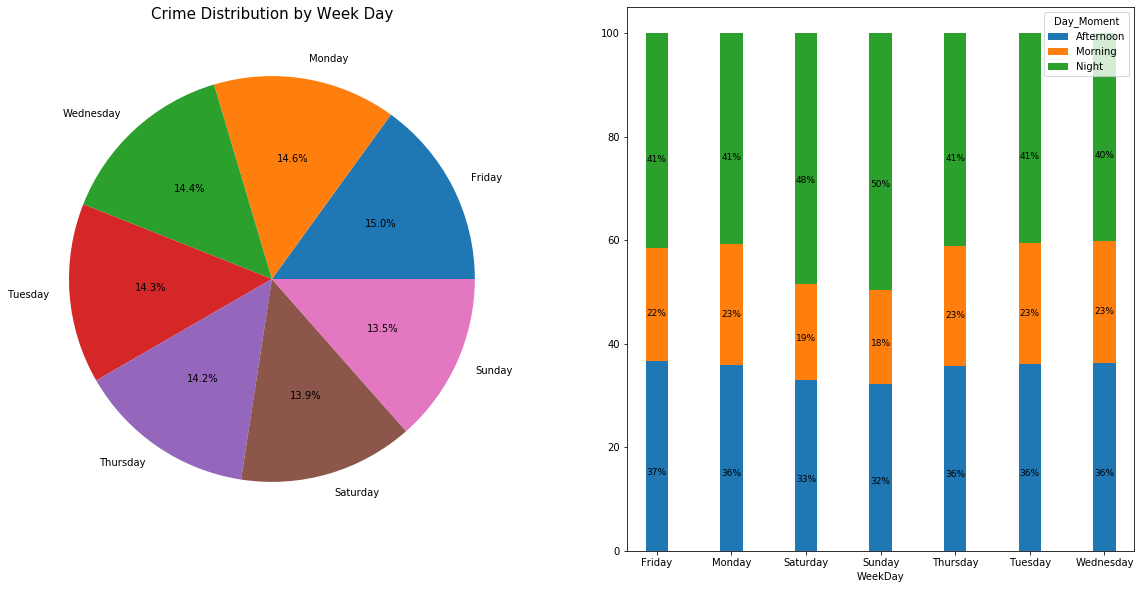

In [13]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

## Distribution of crime by week day
ax1 = (baltimore_data.WeekDay.value_counts()*100/len(baltimore_data)).plot.pie(autopct='%.1f%%', figsize=(20,10), ax=axes1)
ax1.set_ylabel('')
ax1.set_title('Crime Distribution by Week Day', fontsize=15)

## crimes
weekday_moment = baltimore_data.groupby(['WeekDay','Day_Moment']).size().unstack()

ax2 = (weekday_moment.T*100/weekday_moment.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, ax=axes2)

for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax2.annotate('{:.0f}%'.format(height), (p.get_x()+.05*width, p.get_y()+.4*height),
                  size = 9)   

* There is no relevant differences in the occurence of crimes in each day of the week, since the probability is almost the same for all of them and the distribution of crimes during each day is the same as well. 

Text(0, 0.5, 'Crime Amount')

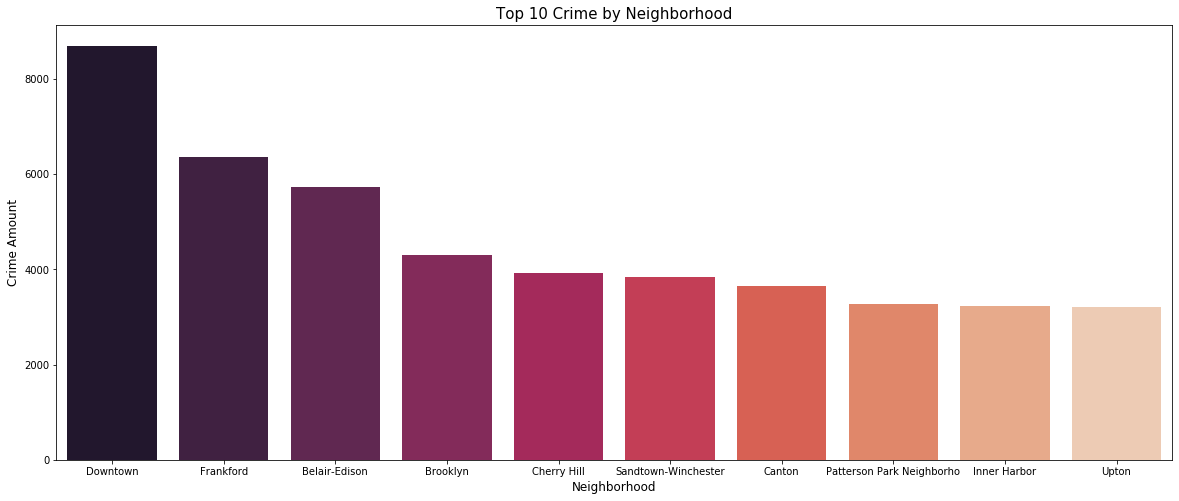

In [14]:
## TOP 10 Neighborhood

## Let's count the amount incidents
table1 = baltimore_data.groupby(["Neighborhood"]).size().reset_index(name='Total Incidents')
table1 = table1.sort_values(by=['Total Incidents'], ascending=False)
table1 = table1.head(10)

### Plotting the crime distriibution over the period of study
plt.figure(figsize=(20,8))
ax1 = sns.barplot(x='Neighborhood', y='Total Incidents', data=table1, palette='rocket')

## axes
ax1.axes.get_xaxis().set_visible(True)
ax1.set_title('Top 10 Crime by Neighborhood', fontsize=15)
ax1.set_xlabel('Neighborhood', fontsize=12)
ax1.set_ylabel('Crime Amount', fontsize=12)

* Downtown is the zone of the city where crimes were more frequent during the time of study. 

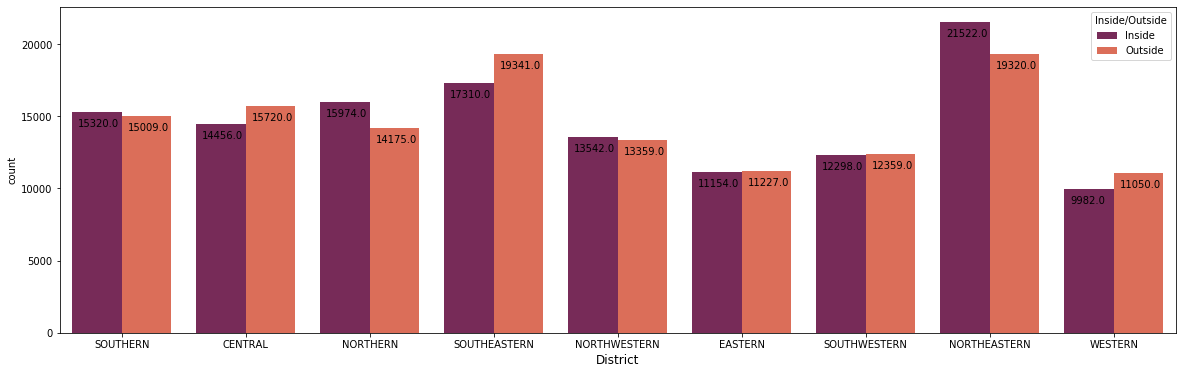

In [16]:
## Crime by district
plt.figure(figsize=(20,6))
ax = sns.countplot(x='District', hue='Inside/Outside', data=baltimore_data, palette='rocket')
ax.axes.get_yaxis().set_visible(True)
ax.set_xlabel('District', fontsize=12)

for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()-1000), size = 10)
        
plt.show()

* The occurences of crimes inside and outside of a place were almost the same for each district. 
* Northeastern was the district with the higest crime occurrences, followd by Southeastern.

##### MAP

Let's visualize how are distributed LARCENY occurences in the city through a map.

In [24]:
### Importing libraries
import geopandas as gpd
import folium
from folium import Marker
from geopandas.tools import geocode
from folium.plugins import HeatMap, MarkerCluster

In [18]:
## obtaining a reference point of Baltimore using Geocode function

ref_point = geocode("Baltimore", provider="nominatim")
ref_point

geometry  \
0  POINT (-76.61076 39.29088)   

                                             address  
0  Baltimore, Maryland, 21203, United States of A...

In [21]:
## filtering data set

filter1 = baltimore_data.Year.isin(['2017']) 
filter2 = baltimore_data.CrimeType.isin(['LARCENY'])
crimes_subset = baltimore_data[filter1 & filter2]
crimes_subset.head()

CrimeDate CrimeTime CrimeCode               Location CrimeType  \
19 2017-09-02  18:00:00        6G         100 S BROADWAY   LARCENY   
25 2017-09-02  15:00:00        6J     100 W LEXINGTON ST   LARCENY   
37 2017-09-02  09:35:00        6J  2500 PENNSYLVANIA AVE   LARCENY   
38 2017-09-02  09:00:00        6G        2000 LINDEN AVE   LARCENY   
42 2017-09-02  08:09:00        6J       3600 WILKENS AVE   LARCENY   

   Inside/Outside   Post      District     Neighborhood  Longitude  Latitude  \
19         Inside  212.0  SOUTHEASTERN  Washington Hill  -76.59390  39.29020   
25         Inside  111.0       CENTRAL         Downtown  -76.61729  39.29164   
37        Outside  733.0       WESTERN       Penn North  -76.64277  39.31033   
38         Inside  133.0       CENTRAL   Reservoir Hill  -76.63251  39.31059   
42         Inside  832.0  SOUTHWESTERN      Violetville  -76.67980  39.27101   

                         Location 1     Premise  Total Incidents Day_Moment  \
19  (39.2902000000, -76.5939000000)  CONVENIENC                1  Afternoon   
25  (39.2916400000, -76.6172900000)  OFFICE BUI                1  Afternoon   
37  (39.3103300000, -76.6427700000)      STREET                1    Morning   
38  (39.3105900000, -76.6325100000)  LAUNDRY/CL                1    Morning   
42  (39.2710100000, -76.6798000000)   CARRY OUT                1    Morning   

    Day  Month  Year   WeekDay Month_Name  
19    2      9  2017  Saturday        Sep  
25    2      9  2017  Saturday        Sep  
37    2      9  2017  Saturday        Sep  
38    2      9  2017  Saturday        Sep  
42    2      9  2017  Saturday        Sep

In [25]:
## CREATING THE MAP

## MAP
bal_map = folium.Map(location=[39.29088, -76.61076], tiles='openstreetmap', zoom_start=13)


# Add points to the map
mc = MarkerCluster()
for idx, row in crimes_subset.iterrows():
    mc.add_child(Marker([row['Latitude'], row['Longitude']]))

bal_map.add_child(mc)    
    

# Display the map
bal_map